In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import pickle

In [2]:
sns.set()

```python

with open('yelp_academic_dataset_user.json') as json_file:      # How to load a large json file in a dataframe.
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

data = pd.DataFrame(data)

with open('test_user.pkl','wb') as f:          # How to dump the data into pickle
    pickle.dump(data,f)
    
with open('test_user.pkl','rb') as f:          # How to load the data from pickle
    data_user = pickle.load(f)
```

In [3]:
with open('test_user.pkl','rb') as f:
    data_user = pickle.load(f)
with open('test_rev.pkl','rb') as f:
    data_review = pickle.load(f)
with open('test_biz.pkl','rb') as f:
    data_biz = pickle.load(f)

In [4]:
import matplotlib.pyplot as plt

In [124]:
data_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


### Let's see the distribution of the star ratings in the reviews dataset

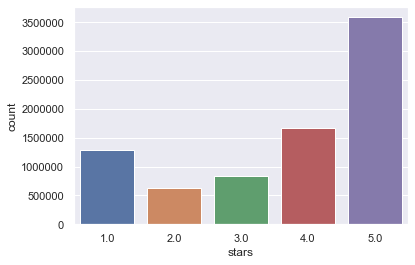

In [125]:
sns.countplot(data_review['stars'])

In [126]:
data_biz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


Looking at the categories column, it looks like the dataset is full of all kinds of businesses. We are interested in the restaurants category in the Greater Cleveland area.

In [127]:
ohio_restaurants = data_biz[(data_biz['categories'].str.contains('Restaurant' or 'restaurant' or 'Food' or 'food') == True) & (data_biz['state'] == 'OH')]

In [128]:
ohio_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
41,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': '{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:..."
49,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ..."
54,lK-wuiq8b1TuU7bfbQZgsg,Hingetown,,Cleveland,OH,44113,41.489343,-81.711029,3.0,4,1,"{'Alcohol': 'u'none'', 'GoodForKids': 'True', ...","Shopping Centers, Food, Coffee & Tea, Cafes, M...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
83,7j0kor_fkeYhyEpXh4OpnQ,Scramblers - Strongsville,16726 Pearl Rd,Strongsville,OH,44136,41.295689,-81.835722,3.5,81,1,"{'BusinessAcceptsCreditCards': 'True', 'Ambien...","Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'..."
102,a6d7UcYnRvbr4t-THg4pSQ,The Pub,19304 Detroit Rd,Rocky River,OH,44116,41.481890,-81.836143,3.5,17,0,"{'RestaurantsAttire': 'u'casual'', 'BusinessPa...","Pubs, Food, Bars, Beer, Wine & Spirits, Restau...","{'Monday': '15:0-23:0', 'Tuesday': '15:0-23:0'..."


In [19]:
ohio_restaurants['review_count'].describe()

count    5914.000000
mean       44.533987
std        76.262577
min         3.000000
25%         7.000000
50%        19.000000
75%        51.000000
max      1372.000000
Name: review_count, dtype: float64

Let's filter out the places that heave at least 50 reviews!

In [129]:
ohio_restaurants = ohio_restaurants[ohio_restaurants['review_count']>=50]

In [130]:
ohio_restaurants = ohio_restaurants[ohio_restaurants['is_open'] != 0]   # Filter out closed restaurants

In [123]:
with open('ohio_restaurants.pkl','wb') as f:          # How to dump the data into pickle
    pickle.dump(ohio_restaurants,f)

with open('ohio_restaurants.pkl','rb') as f:          # How to load the data from pickle
    ohio_restaurants = pickle.load(f)

In [32]:
ohio_restaurants.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [33]:
ohio_ids = ohio_restaurants['business_id']

## We want the user reviews for only these businesses. Merging with the review dataset

In [34]:
ohio_reviews = data_review.merge(ohio_ids)

In [35]:
ohio_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
1,4jMOeTiqNXQ8bpmFdWoFUQ,zFCuveEe6M-ijY1iy23IJg,HQl28KMwrEKHqhFrrDqVNQ,5.0,6,2,5,"We walked into Melt. ""Did you want to put your...",2011-08-25 04:24:23
2,wHrtQRyk0ypungXd6hT8nQ,4V985R3RG-rv0B7WCPQzeQ,HQl28KMwrEKHqhFrrDqVNQ,1.0,1,0,0,I commented on how slow the service was last A...,2015-03-04 20:37:43
3,DTb3X5aVOGQ8HHCSAr87wA,nFGcoL6wuPQzxsNJVSfGrA,HQl28KMwrEKHqhFrrDqVNQ,4.0,2,0,0,We walked in off the streets on a September ni...,2014-09-10 01:38:55
4,NPyAutqgU_zIZBSnycJd6w,CJqgUQeWhdgbDyLAFy7xvQ,HQl28KMwrEKHqhFrrDqVNQ,4.0,0,0,0,Brunch on Saturday was excellent. The Bloody M...,2018-01-21 18:50:29


In [37]:
ohio_reviews['user_id'].nunique()

65418

### Let's have a look at the users data

In [38]:
data_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


In [59]:
data_user['review_count'].describe()

count    1.968703e+06
mean     2.216930e+01
std      7.674226e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.500000e+01
max      1.445500e+04
Name: review_count, dtype: float64

In [55]:
data_user[data_user['review_count'] > 15].count()

user_id               490718
name                  490718
review_count          490718
yelping_since         490718
useful                490718
funny                 490718
cool                  490718
elite                 490718
friends               490718
fans                  490718
average_stars         490718
compliment_hot        490718
compliment_more       490718
compliment_profile    490718
compliment_cute       490718
compliment_list       490718
compliment_note       490718
compliment_plain      490718
compliment_cool       490718
compliment_funny      490718
compliment_writer     490718
compliment_photos     490718
dtype: int64

In [58]:
data_user[data_user['elite'].apply(lambda x: len(str(x))>0)].count() # Elite users once or more than once

user_id               75961
name                  75961
review_count          75961
yelping_since         75961
useful                75961
funny                 75961
cool                  75961
elite                 75961
friends               75961
fans                  75961
average_stars         75961
compliment_hot        75961
compliment_more       75961
compliment_profile    75961
compliment_cute       75961
compliment_list       75961
compliment_note       75961
compliment_plain      75961
compliment_cool       75961
compliment_funny      75961
compliment_writer     75961
compliment_photos     75961
dtype: int64

Let's filter out all those people who have either posted more than 15 reviews or have been elite at least once.

In [60]:
imp_users = data_user[(data_user['review_count'] > 15) | (data_user['elite'].apply(lambda x: len(str(x))>0))]

In [61]:
imp_users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


Let's not worry about the other aspects of the important users for now!

In [62]:
imp_user_ids = imp_users['user_id']

Merging them with the ohio_reviews column, we get

In [63]:
imp_ohio_reviews = ohio_reviews.merge(imp_user_ids)

In [122]:
with open('imp_ohio_reviews.pkl','wb') as f:          # How to dump the data into pickle
    pickle.dump(imp_ohio_reviews,f)

with open('imp_ohio_reviews.pkl','rb') as f:          # How to load the data from pickle
    imp_ohio_reviews = pickle.load(f)

In [92]:
imp_ohio_reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
1,jCza0LPv1vNU0FF-NFMWQA,V34qejxNsCbcgD8C0HVk-Q,ErxACeMyF4hSQyGhpEt4Tw,5.0,1,1,1,This is definitely one of my favorite Thai res...,2019-12-04 14:09:06
2,14_N-s_7TsEpzgjnXJMu9Q,V34qejxNsCbcgD8C0HVk-Q,eoJfl5vG7X87QhcKb0nt5Q,4.0,4,1,3,This is exactly what you think it will be. A h...,2014-11-27 05:28:11
3,eE3ekstCj5dNcBJVsbOJBw,V34qejxNsCbcgD8C0HVk-Q,VH2BjFjc9usDquDgoHhptA,4.0,2,0,2,How exciting to have another great Barrio loca...,2015-02-11 03:05:31
4,B6-F7JQzRIiMQpphyPR3VA,V34qejxNsCbcgD8C0HVk-Q,0youcKV6-eE3F2MQj1l6Fw,4.0,1,0,1,I attended a group event here with about 80 pe...,2014-11-08 19:11:34
...,...,...,...,...,...,...,...,...,...
109243,SF5zZw45MY0lUyPALELNVA,CKsoyywuBz64rp0KcLOyzg,UlEmdFkVVJq9e7vBvy48Fw,4.0,0,0,0,"Decent salsa, large portions, and fast, friend...",2011-05-03 14:21:26
109244,3ykjOqESIRRgpU_DLDvQOw,8ccb7BYOCHmWmSNfeGOtWg,UlEmdFkVVJq9e7vBvy48Fw,5.0,0,0,0,If you're in the area and like Mexican this is...,2016-10-08 00:36:07
109245,SdEkFuFCRC-4G_5q6oxoNA,0xSsmiIhjgHt_xKJ6uledw,4QIpOUetqRefQ3HGfdIQoA,5.0,1,0,0,Brassica is THE BEST. I am a huge huge fan of ...,2019-10-17 23:36:29
109246,4DyZB687e_ZOMtj4sq_11g,yXPlPOZe17cjEGqrkvSfNA,4QIpOUetqRefQ3HGfdIQoA,5.0,1,1,1,Insane. That's all I have to say. Loved it. Gr...,2019-08-14 23:51:42


## Filtering done!

### Next, data cleaning!

In [72]:
imp_ohio_reviews['user_id'].count()

109248

```python
merged_ohio['all_reviews'] = merged_ohio.groupby('business_id')['text'].transform(lambda x: '|||'.join(x))
```

In [119]:
ohio_restaurants['sep_categories'] = ohio_restaurants['categories'].str.split(', ')


In [118]:
ohio_restaurants['categories']

83        Breakfast & Brunch, Restaurants, American (Tra...
115       Coffee & Tea, Restaurants, Food, Breakfast & B...
433                         Chinese, Fast Food, Restaurants
492       Mediterranean, Salad, Seafood, American (New),...
577                                       Restaurants, Thai
                                ...                        
208388            Restaurants, Thai, Bubble Tea, Food, Soup
208534    Pubs, Sandwiches, Nightlife, American (Traditi...
208628    Breakfast & Brunch, Cafes, American (Tradition...
209150          Sandwiches, Breakfast & Brunch, Restaurants
209343    Restaurants, Barbeque, Comfort Food, Salad, Ev...
Name: categories, Length: 1325, dtype: object

In [89]:
ohio_restaurants.nlargest(50,'review_count')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,sep_categories
44105,LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...","[Food, American (New), Salad, Sandwiches, ..."
17165,GIfZNMP0oIJCje_Xp0Bgrw,The Greenhouse Tavern,2038 E 4th St,Cleveland,OH,44115,41.499074,-81.690421,3.5,1104,1,"{'RestaurantsReservations': 'True', 'BikeParki...","Breakfast & Brunch, Gastropubs, French, Restau...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...","[Breakfast & Brunch, Gastropubs, French, Re..."
100124,J1RDyyPxhioqm8c_fi4P4Q,Lola,2058 E 4th St,Cleveland,OH,44115,41.498793,-81.690258,4.0,1078,1,"{'RestaurantsTakeOut': 'False', 'Alcohol': ''f...","American (New), Wine Bars, Restaurants, Nightl...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...","[American (New), Wine Bars, Restaurants, Ni..."
63257,meXjqyhTNLFmknY39y2sMg,Great Lakes Brewing Company,2516 Market Ave,Cleveland,OH,44113,41.484399,-81.704521,4.0,995,1,"{'NoiseLevel': 'u'average'', 'BikeParking': 'T...","Event Planning & Services, Breweries, Venues &...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-0:0', ...","[Event Planning & Services, Breweries, Venue..."
136573,cX2Nr_XmGYlMaBW35M0sUg,Mabel's BBQ,2050 E 4th St,Cleveland,OH,44115,41.498951,-81.690225,4.0,974,1,"{'RestaurantsReservations': 'False', 'Restaura...","Barbeque, Restaurants, Nightlife, Bars","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...","[Barbeque, Restaurants, Nightlife, Bars]"
171042,JFaTPxWQC14VmFnXLv7W1g,Melt Bar and Grilled,14718 Detroit Ave,Lakewood,OH,44107,41.485336,-81.799077,4.0,926,1,"{'GoodForKids': 'True', 'RestaurantsDelivery':...","Pubs, Bars, Sandwiches, Nightlife, Comfort Foo...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","[Pubs, Bars, Sandwiches, Nightlife, Comfor..."
117066,_5PJ4GHIXNdUdXtohylKGQ,Lucky's Cafe,777 Starkweather Ave,Cleveland,OH,44113,41.477371,-81.683050,4.0,892,1,"{'WiFi': ''free'', 'BusinessAcceptsCreditCards...","Restaurants, Food, Breakfast & Brunch, Coffee ...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ...","[Restaurants, Food, Breakfast & Brunch, Cof..."
17083,F2pfjAZ_3dMTGCKv6c5wOw,Momocho,1835 Fulton Rd,Cleveland,OH,44113,41.484015,-81.709813,4.0,776,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Mexican, Restaurants","{'Tuesday': '17:0-22:0', 'Wednesday': '17:0-22...","[Mexican, Restaurants]"
90210,SzcCJJmreMlWCsNjupdVAA,L'Albatros,11401 Bellflower Rd,Cleveland,OH,44106,41.511744,-81.606395,4.5,679,1,"{'RestaurantsAttire': 'u'dressy'', 'BusinessAc...","French, Restaurants","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...","[French, Restaurants]"
143639,vdloJPM3bSpQTMlwdFek2A,Butcher and the Brewer,2043 E 4th St,Cleveland,OH,44115,41.499218,-81.690129,4.0,676,1,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Food, Restaurants, Pubs, Bars, Beer, Wine & Sp...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-0:0', '...","[Food, Restaurants, Pubs, Bars, Beer, Win..."


In [88]:
categories_list[:10]

['Breakfast & Brunch',
 ' Restaurants',
 ' American (Traditional)',
 ' Salad',
 'Coffee & Tea',
 ' Restaurants',
 ' Food',
 ' Breakfast & Brunch',
 ' American (Traditional)',
 'Chinese']